<a href="https://colab.research.google.com/github/Henriquerezer/Dissertacao/blob/main/Abordagem_de_classifica%C3%A7%C3%A3o_(CLASSES_DISCRETAS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação de bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from imblearn.over_sampling import SMOTE

In [2]:
treino = pd.read_excel('/content/Treino (2).xlsx')
treino['TEMP'] = treino['TEMP'].str.replace("?", "")
treino['HUMIDADE'] = treino['HUMIDADE'].str.replace("%", "")
treino['TEMP'] = treino['TEMP'].astype(float)
treino['HUMIDADE'] = treino['HUMIDADE'].astype(float)
# Função para definir o valor da nova coluna com base nas condições

def definir_valor_nova_coluna(valor):
    if 360 > valor >= 345:
        return 24
    if 345 > valor >= 330:
        return 23
    if 330 > valor >= 315:
        return 22
    elif 315 > valor >= 300:
        return 21
    elif 300 > valor >= 285:
        return 20
    elif 285 > valor >= 270:
        return 19
    elif 270 > valor >= 255:
        return 18
    elif 255 >= valor >= 240:
        return 17
    elif 240 > valor >= 225:
        return 16
    elif 225 > valor >= 210:
        return 15
    elif 210 > valor >= 195:
        return 14
    elif 195 > valor >= 180:
        return 13
    elif 180 > valor >= 165:
        return 12
    elif 165 > valor >= 150:
        return 11
    elif 150 > valor >= 135:
        return 10
    elif 135 > valor >= 120:
        return 9
    elif 120 > valor >= 105:
        return 8
    elif 105 > valor >= 90:
        return 7
    elif 90 > valor >= 75:
        return 6
    elif 75 > valor >= 60:
        return 5
    elif 60 > valor >= 45:
        return 4
    elif 45 > valor >= 30:
        return 3
    elif 30 > valor >= 15:
        return 2
    elif 15 > valor >= 0:
        return 1
    else:
        return None  # Ou qualquer valor padrão para casos que não se encaixem nas condições


# Criar a nova coluna usando a função apply
treino['categorica'] = treino['mg/dL'].apply(definir_valor_nova_coluna)
treino = treino.drop('mg/dL', axis = 1)
treino = treino.dropna()

<ipython-input-2-ed71769b4d7c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  treino['TEMP'] = treino['TEMP'].str.replace("?", "")


In [3]:
X = treino.drop('categorica', axis=1)
y = treino['categorica']

# Passo 1: Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Passo 2: Aplicar SMOTE para balancear as classes no conjunto de treino
smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = ExtraTreesClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, criterion='entropy')

# Definir o número de folds para a validação cruzada
num_folds = 6

# Realizar a validação cruzada
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=num_folds, scoring='accuracy')

# Treinar o modelo com todos os dados de treinamento
model.fit( X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

#print(f"Metrics for {model_name}:")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(


Accuracy: 0.9545
F1 Score: 0.9496
Recall: 0.9545


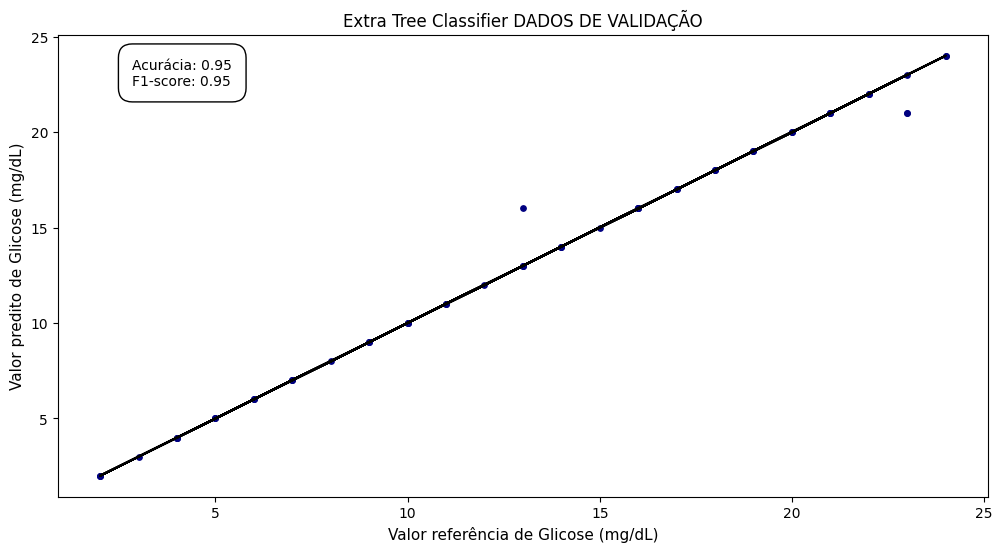

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  # Define uma figura com largura 8 e altura 6
# Criar os pontos x para a linha reta
x_line = y_test

# Criar os pontos y para a linha reta
y_line = y_test

plt.plot(x_line, y_line, color='black', label='Linha Reta')
plt.scatter(y_test, y_pred, color='navy', label='Pontos Preditos', s= 15)

# Configurar os rótulos dos eixos
plt.xlabel('Valor referência de Glicose (mg/dL)', fontsize=11)
plt.ylabel('Valor predito de Glicose (mg/dL)', fontsize=11)

# Configurar o título do gráfico
plt.title('Extra Tree Classifier DADOS DE VALIDAÇÃO')

# Adicionar os valores de RMSE e R2 no canto superior esquerdo
rmse_text = f'Acurácia: {acc:.2f}'
r2_text = f'F1-score: {f1:.2f}'
plt.text(0.08, 0.95, f'{rmse_text}\n{r2_text}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

# Exibir o gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


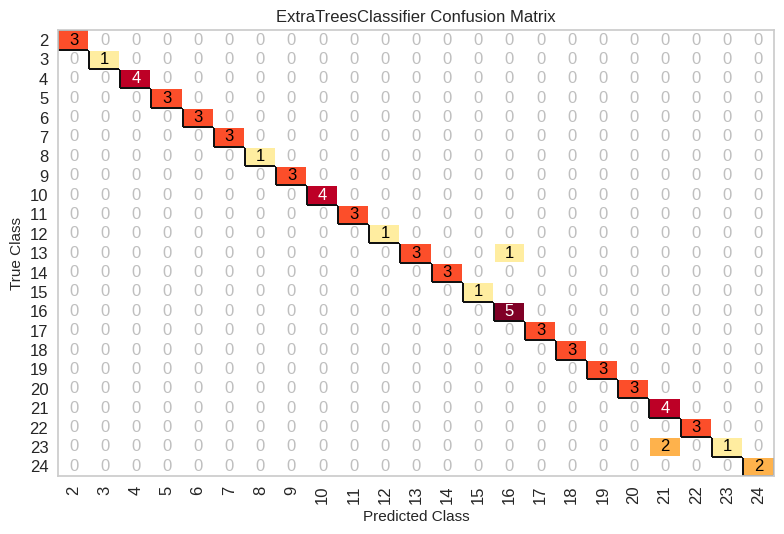

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [5]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)

cm.score( X_test, y_test)
plt.savefig('EXTRA TREE classes discretas VALIDAÇÃO.png')
cm.show()

# TESTE

In [6]:
data = pd.read_excel('/content/teste (2).xlsx')
data['TEMP'] = data['TEMP'].str.replace("?", "")
data['HUMIDADE'] = data['HUMIDADE'].str.replace("%", "")
data = data.dropna()
data['TEMP'] = data['TEMP'].astype(float)
data['HUMIDADE'] = data['HUMIDADE'].astype(float)
data.head()

def definir_valor_nova_coluna(valor):
    if 360 > valor >= 345:
        return 24
    if 345 > valor >= 330:
        return 23
    if 330 > valor >= 315:
        return 22
    elif 315 > valor >= 300:
        return 21
    elif 300 > valor >= 285:
        return 20
    elif 285 > valor >= 270:
        return 19
    elif 270 > valor >= 255:
        return 18
    elif 255 >= valor >= 240:
        return 17
    elif 240 > valor >= 225:
        return 16
    elif 225 > valor >= 210:
        return 15
    elif 210 > valor >= 195:
        return 14
    elif 195 > valor >= 180:
        return 13
    elif 180 > valor >= 165:
        return 12
    elif 165 > valor >= 150:
        return 11
    elif 150 > valor >= 135:
        return 10
    elif 135 > valor >= 120:
        return 9
    elif 120 > valor >= 105:
        return 8
    elif 105 > valor >= 90:
        return 7
    elif 90 > valor >= 75:
        return 6
    elif 75 > valor >= 60:
        return 5
    elif 60 > valor >= 45:
        return 4
    elif 45 > valor >= 30:
        return 3
    elif 30 > valor >= 15:
        return 2
    elif 15 > valor >= 0:
        return 1
    else:
        return None  # Ou qualquer valor padrão para casos que não se encaixem nas condições

# Criar a nova coluna usando a função apply
data['categorica'] = data['mg/dL'].apply(definir_valor_nova_coluna)
data = data.drop('mg/dL', axis = 1)
data = data.dropna()

<ipython-input-6-67a433e395ee>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['TEMP'] = data['TEMP'].str.replace("?", "")


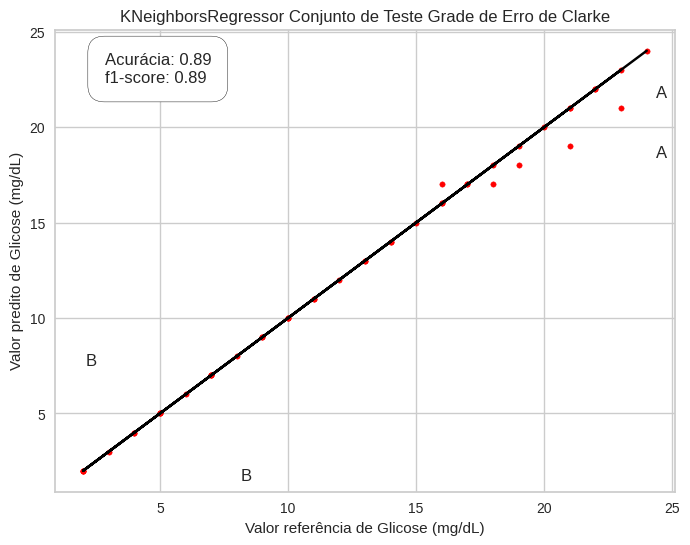

In [7]:
X = data.drop('categorica', axis=1)
y = data['categorica']

y_pred = model.predict(X)

acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')



import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  # Define uma figura com largura 8 e altura 6
# Criar os pontos x para a linha reta
x_line = y

# Criar os pontos y para a linha reta
y_line = y

percentage = 0.2
#upper_line = y_line * (1 + percentage)
#lower_line = y_line * (1 - percentage)

#plt.plot(x_line, upper_line, color='gray', linestyle='--')
#plt.plot(x_line, lower_line, color='gray', linestyle='--')

plt.plot(x_line, y_line, color='black', label='Linha Reta')
plt.scatter(y, y_pred, color='red', label='Pontos Preditos', s= 15)

# Configurar os rótulos dos eixos
plt.xlabel('Valor referência de Glicose (mg/dL)', fontsize=11)
plt.ylabel('Valor predito de Glicose (mg/dL)', fontsize=11)

# Configurar o título do gráfico
plt.title('KNeighborsRegressor Conjunto de Teste Grade de Erro de Clarke')

# Adicionar os valores de RMSE e R2 no canto superior esquerdo
rmse_text = f'Acurácia: {acc:.2f}'
r2_text = f'f1-score: {f1:.2f}'
plt.text(0.08, 0.95, f'{rmse_text}\n{r2_text}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

plt.text(0.97, 0.88, 'A', transform=plt.gca().transAxes,
         verticalalignment='top')
plt.text(0.97, 0.75, 'A', transform=plt.gca().transAxes,
         verticalalignment='top')

plt.text(0.05, 0.3, 'B', transform=plt.gca().transAxes,
         verticalalignment='top')

plt.text(0.3, 0.05, 'B', transform=plt.gca().transAxes,
         verticalalignment='top')
plt.savefig('EXTRA TREE classes discretas teste.png')
# Exibir o gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


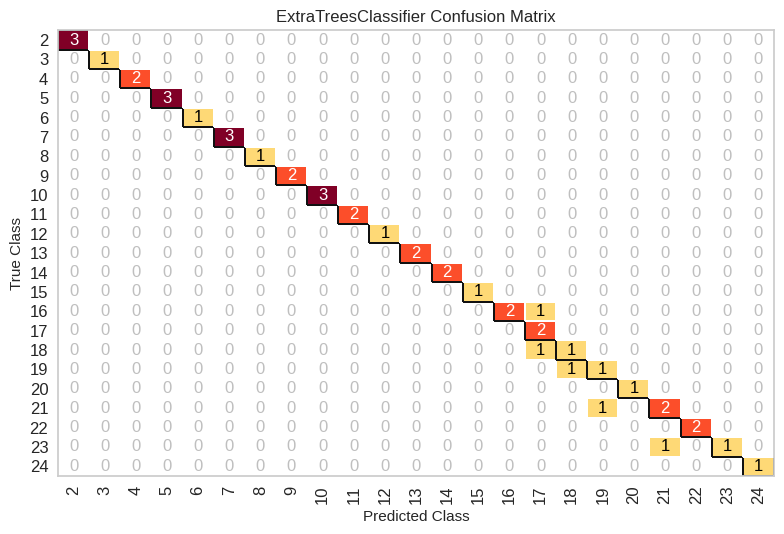

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [8]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)

cm.score(X, y)
plt.savefig('EXTRA TREE classes discretas matriz de confusão teste.png')
cm.show()

# NOVAS LEITURAS

In [9]:
novas_leituras = pd.read_excel('/content/teste_final.xlsx')
novas_leituras['TEMP'] = novas_leituras['TEMP'].str.replace("?", "")
novas_leituras['HUMIDADE'] = novas_leituras['HUMIDADE'].str.replace("%", "")
novas_leituras = novas_leituras.dropna()
novas_leituras['TEMP'] = novas_leituras['TEMP'].astype(float)
novas_leituras['HUMIDADE'] = novas_leituras['HUMIDADE'].astype(float)
def definir_valor_nova_coluna(valor):
    if 390 > valor >= 345:
        return 24
    if 345 > valor >= 330:
        return 23
    if 330 > valor >= 315:
        return 22
    elif 315 > valor >= 300:
        return 21
    elif 300 > valor >= 285:
        return 20
    elif 285 > valor >= 270:
        return 19
    elif 270 > valor >= 255:
        return 18
    elif 255 >= valor >= 240:
        return 17
    elif 240 > valor >= 225:
        return 16
    elif 225 > valor >= 210:
        return 15
    elif 210 > valor >= 195:
        return 14
    elif 195 > valor >= 180:
        return 13
    elif 180 > valor >= 165:
        return 12
    elif 165 > valor >= 150:
        return 11
    elif 150 > valor >= 135:
        return 10
    elif 135 > valor >= 120:
        return 9
    elif 120 > valor >= 105:
        return 8
    elif 105 > valor >= 90:
        return 7
    elif 90 > valor >= 75:
        return 6
    elif 75 > valor >= 60:
        return 5
    elif 60 > valor >= 45:
        return 4
    elif 45 > valor >= 30:
        return 3
    elif 30 > valor >= 15:
        return 2
    elif 15 > valor >= 0:
        return 1
    else:
        return None  # Ou qualquer valor padrão para casos que não se encaixem nas condições

# Criar a nova coluna usando a função apply
novas_leituras['categorica'] = novas_leituras['mg/dL'].apply(definir_valor_nova_coluna)
novas_leituras = novas_leituras.drop('mg/dL', axis = 1)
novas_leituras = novas_leituras.dropna()

<ipython-input-9-d10da9a54362>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  novas_leituras['TEMP'] = novas_leituras['TEMP'].str.replace("?", "")


In [10]:
X = novas_leituras.drop('categorica', axis=1)
y = novas_leituras['categorica']

y_pred = model.predict(X)

acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')

print(acc)

0.9473684210526315


/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


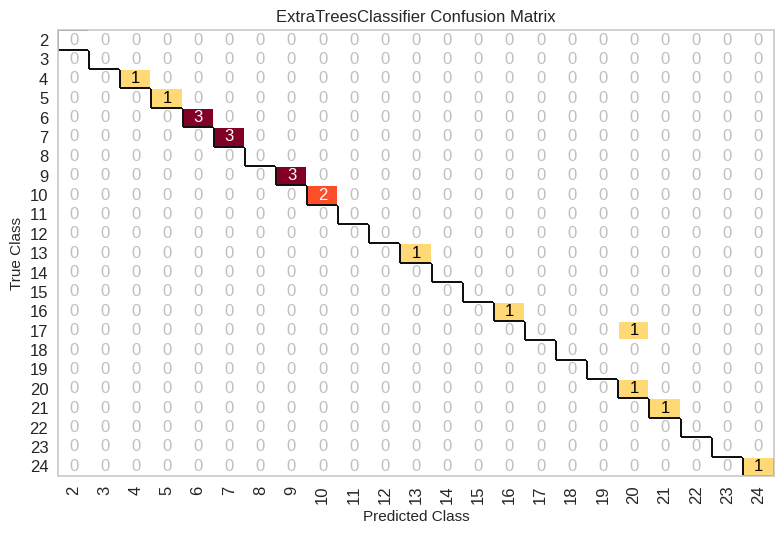

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)

cm.score(X, y)
plt.savefig('EXTRA TREE classes discretas matriz de confusão novas leituras.png')
cm.show()